**MULTIPLE DISEASE PREDICTION USING MACHINE LEARNING**

------------------------------------------------------------------------

**Objective** -
The objective of this project is to develop a machine learning model capable of predicting multiple diseases based on various symptoms and health indicators. By leveraging a dataset containing patient health records, the project aims to preprocess and analyze the data, build a robust classification model, and evaluate its performance to ensure accurate disease prediction. The ultimate goal is to assist healthcare professionals in early diagnosis and treatment planning by providing a reliable tool for disease prediction.

**Data Source** - Dataset:- https://github.com/YBI-Foundation/Dataset/blob/main/MultipleDiseasePrediction.csv

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


**Import Dataset**

In [2]:
# Load the CSV file
data = pd.read_csv("/content/MultipleDiseasePrediction.csv")


**Describe Data**

In [3]:
# Display the first few rows of the dataset
data.head(5)



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
# Display the information about the dataset
data.tail(5)



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
data.shape

(4920, 133)

In [7]:
num_columns = len(data.columns)
print(num_columns)

133


In [8]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.isnull().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

**Data Visualization**

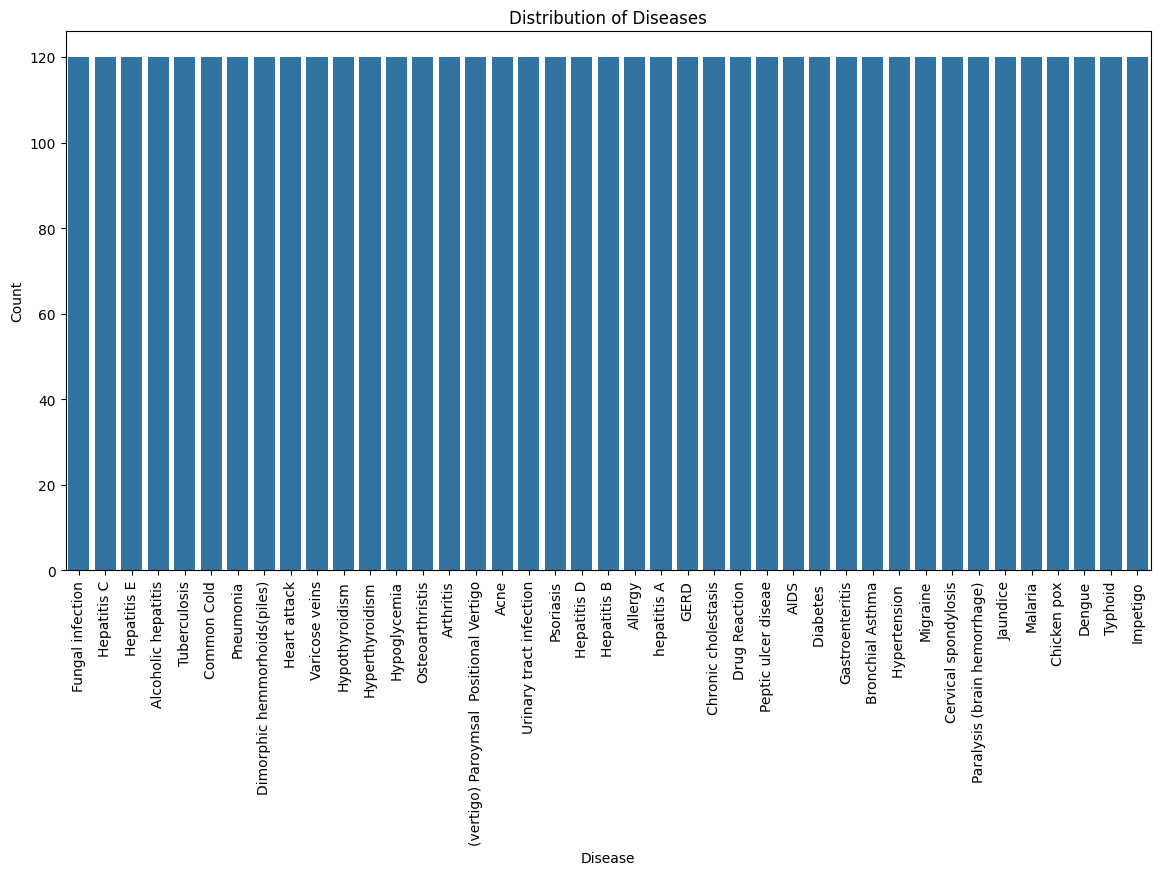

In [10]:
plt.figure(figsize=(14, 7))
sns.countplot(x='prognosis', data=data, order=data['prognosis'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()


In [11]:
corr = data.select_dtypes(include=['number']).corr()
corr

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


<Axes: >

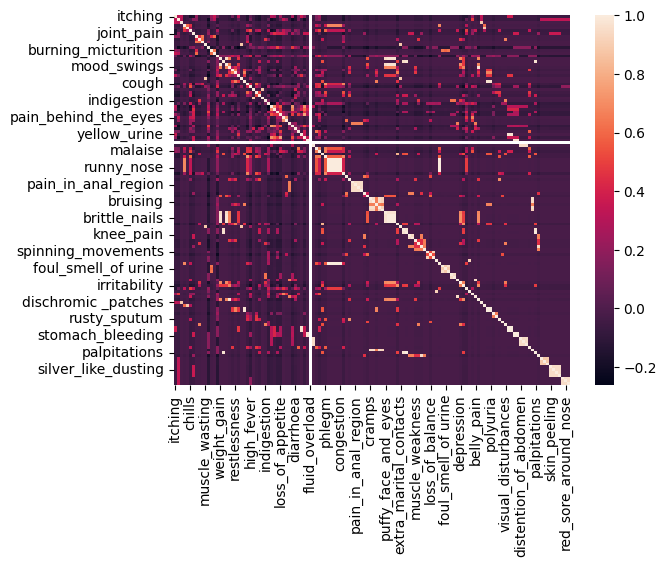

In [12]:
sns.heatmap(corr)

**Data Preprocessing**

In [13]:
label_encoder = LabelEncoder()
data['prognosis'] = label_encoder.fit_transform(data['prognosis'])
print(data.isnull().sum().sum())


0


**Define Target Variable (y) and Feature Variables (X)**

In [14]:
X = data.drop(columns='prognosis')
y = data['prognosis']

In [25]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y.head(12)

0     15
1     15
2     15
3     15
4     15
5     15
6     15
7     15
8     15
9     15
10     4
11     4
Name: prognosis, dtype: int64

**Train Test Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2529)
print(X.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4920, 132) (3690, 132) (1230, 132) (3690,) (1230,)


**Select and Train Model**

In [16]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

**Model Evaluation**

In [28]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:' , accuracy)

Accuracy: 1.0


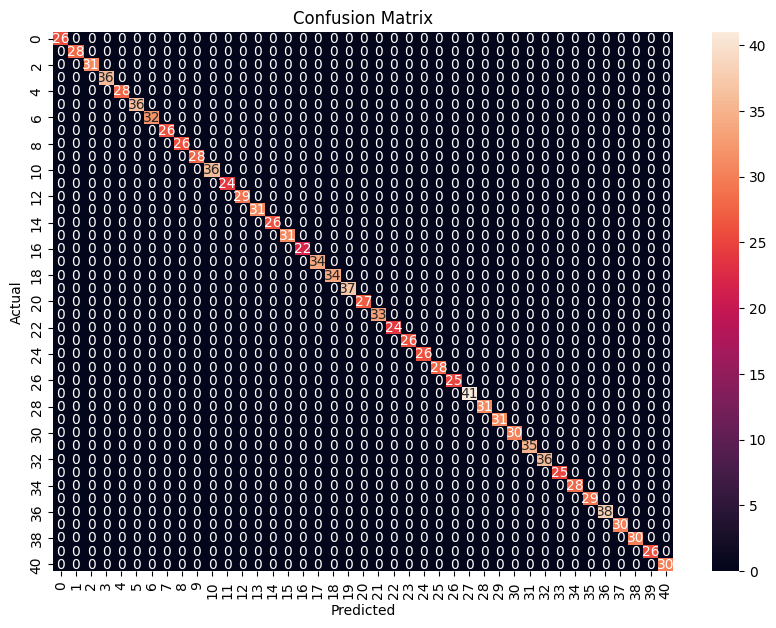

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(class_report)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        26
                                   AIDS       1.00      1.00      1.00        28
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        32
                   Cervical spondylosis       1.00      1.00      1.00        26
                            Chicken pox       1.00      1.00      1.00        26
                    Chronic cholestasis       1.00      1.00      1.00        28
                            Common Cold       1.00      1.00      1.00        36
                           

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy: 1.0


**Feature Importance**

In [20]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


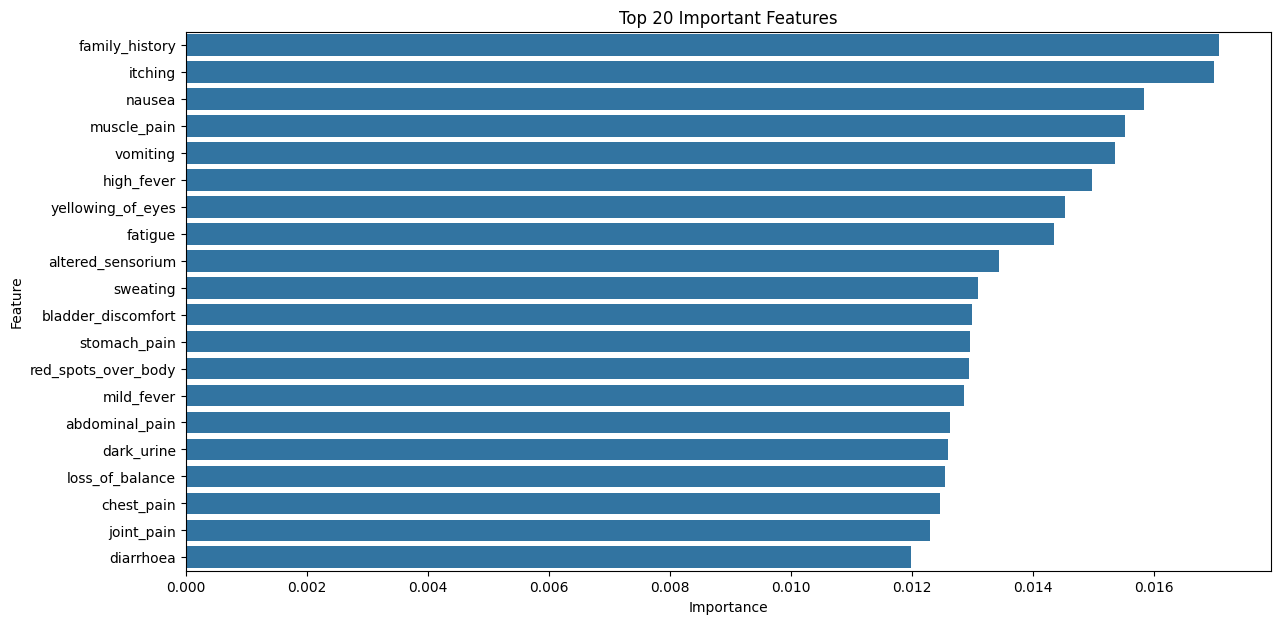

In [21]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**For Saving the Model**

In [ ]:
joblib.dump(model, 'random_forest_model.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

**Interactive Prediction**

In [34]:
import pandas as pd
import joblib

# Load the trained model and label encoder
model = joblib.load('random_forest_model.joblib')
label_encoder = joblib.load('label_encoder.joblib')

# Load the CSV file to get the symptom names (assuming you have the CSV)
file_path = "/content/MultipleDiseasePrediction.csv"
data = pd.read_csv(file_path)

# Extract symptom names from the dataset (excluding the 'prognosis' column)
symptoms = data.columns[:-1]  # All columns except the last one which is 'prognosis'

# Function to ask user for symptoms
def get_user_symptoms(symptoms):
    user_symptoms = {}
    print("Please answer 'yes' or 'no' for the following symptoms:")
    for symptom in symptoms:
        while True:
            response = input(f"Do you have {symptom.replace('_', ' ')}? (yes/no): ").strip().lower()
            if response == 'yes':
                user_symptoms[symptom] = 1
                break
            elif response == 'no':
                user_symptoms[symptom] = 0
                break
            else:
                print("Invalid input. Please enter 'yes' or 'no'.")
    return user_symptoms

# Get symptoms from user
user_symptoms = get_user_symptoms(symptoms)

# Convert the user's symptoms to a DataFrame
user_data = pd.DataFrame([user_symptoms])

# Ensure the columns are in the same order as the training data
user_data = user_data[symptoms]

# Make a prediction
predicted_prognosis = model.predict(user_data)
predicted_prognosis_label = label_encoder.inverse_transform(predicted_prognosis)

# Display the predicted disease
print(f'\nPredicted Disease: {predicted_prognosis_label[0]}')


Please answer 'yes' or 'no' for the following symptoms:
Do you have itching? (yes/no): yes
Do you have skin rash? (yes/no): yes
Do you have nodal skin eruptions? (yes/no): yes
Do you have continuous sneezing? (yes/no): np
Invalid input. Please enter 'yes' or 'no'.
Do you have continuous sneezing? (yes/no): no
Do you have shivering? (yes/no): no
Do you have chills? (yes/no): no
Do you have joint pain? (yes/no): no
Do you have stomach pain? (yes/no): no
Do you have acidity? (yes/no): no
Do you have ulcers on tongue? (yes/no): no
Do you have muscle wasting? (yes/no): no
Do you have vomiting? (yes/no): no
Do you have burning micturition? (yes/no): no
Do you have spotting  urination? (yes/no): no
Do you have fatigue? (yes/no): no
Do you have weight gain? (yes/no): no
Do you have anxiety? (yes/no): no
Do you have cold hands and feets? (yes/no): no
Do you have mood swings? (yes/no): no
Do you have weight loss? (yes/no): no
Do you have restlessness? (yes/no): no
Do you have lethargy? (yes/no):

**Explaination** - This project illustrates the process of building a machine learning model for disease prediction, from data loading and preprocessing to model training and evaluation. By using a RandomForestClassifier, the project leverages an ensemble method that combines multiple decision trees to improve predictive accuracy and control over-fitting. The thorough evaluation using accuracy, confusion matrix, and classification report ensures that the model's performance is well understood and reliable.

Such a predictive model can be a valuable tool for healthcare professionals, enabling early and accurate diagnosis, which is critical for effective treatment planning and patient care. The model's ability to handle a wide range of symptoms and health indicators makes it versatile and potentially applicable to various disease prediction tasks.

  -----------------------------------------------------------------------


*   Name:-Saikat paramanik
*   Email:- saikatparamanik1136@gmail.com
*   Submitted to :- YBI-Foundation




